### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
import warnings

#### Import the CSV Data as Pandas DataFrame


In [2]:
train = pd.read_csv("train")
test = pd.read_csv("test")

#### X_TRAIN and Y_TRAIN

In [3]:
X_train = train[[ 'Quota', 'Seat Type','Institute' , 'Gender','Year','Duration','Round','Opening','Closing', "Avg_ranking"]]
X_test = test[[ 'Quota', 'Seat Type','Institute' , 'Gender','Year','Duration','Round','Opening','Closing' ,"Avg_ranking"]]

#### X_TEST and Y_TEST

In [4]:
Y_train = train[["Institute" , 'Degree' , 'Branch']]
Y_test = test[["Institute" , 'Degree', 'Branch']]

#### Create an Evaluate Function to give all metrics after model Training


In [5]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    acuracy = r2_square
    return mae, rmse, r2_square,acuracy

In [6]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": MultiOutputClassifier(RandomForestClassifier()),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": MultiOutputClassifier(CatBoostRegressor(verbose=False)),
    "AdaBoost Regressor": MultiOutputClassifier(AdaBoostClassifier())
}

In [7]:
model_list = []
r2_list =[]
 
accuracy_list = []


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train) # Train model

    # Make predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2, model_train_accuracy = evaluate_model(Y_train, Y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2, model_test_accuracy = evaluate_model(Y_test, Y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print("- Accuracy Score: {:.4f}".format(model_train_accuracy))


    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    print("- Accuracy Score: {:.4f}".format(model_test_accuracy))
    r2_list.append(model_test_r2)
    accuracy_list.append(model_test_accuracy)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 14.9319
- Mean Absolute Error: 7.4500
- R2 Score: 0.5811
- Accuracy Score: 0.5811
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 13.2287
- Mean Absolute Error: 6.7228
- R2 Score: 0.5458
- Accuracy Score: 0.5458


Lasso
Model performance for Training set
- Root Mean Squared Error: 14.9792
- Mean Absolute Error: 7.7930
- R2 Score: 0.3486
- Accuracy Score: 0.3486
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 13.3790
- Mean Absolute Error: 7.0851
- R2 Score: 0.3082
- Accuracy Score: 0.3082


Ridge
Model performance for Training set
- Root Mean Squared Error: 14.9319
- Mean Absolute Error: 7.4500
- R2 Score: 0.5811
- Accuracy Score: 0.5811
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 13.2287
- Mean Absolute Error: 6.7228
- R2 Score: 0.5458
- Accuracy Score: 0.5458


K-Neigh

#### Results

In [8]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
7,CatBoosting Regressor,0.617024
6,XGBRegressor,0.593833
0,Linear Regression,0.545794
2,Ridge,0.545793
5,Random Forest Regressor,0.445639
1,Lasso,0.308179
4,Decision Tree,0.242509
3,K-Neighbors Regressor,-0.260945
8,AdaBoost Regressor,-2.453126


In [19]:
result = pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"],ascending=False)


<Axes: xlabel='Model Name'>

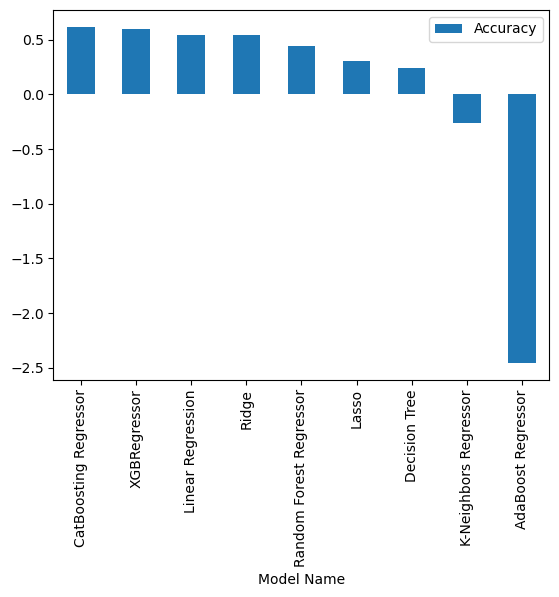

In [22]:
result.plot.bar(x='Model Name' , y='Accuracy')

#### CatBoosting Regressor

In [10]:
CatBoost_model =  MultiOutputClassifier(CatBoostRegressor())
CatBoost_model = CatBoost_model.fit(X_train, Y_train)
Y_pred = CatBoost_model.predict(X_test)
score = r2_score(Y_test, Y_pred)*100
print(" Accuracy of the model is %.2f" %score)

Learning rate set to 0.080391
0:	learn: 5.9873559	total: 17.9ms	remaining: 17.9s
1:	learn: 5.5269552	total: 34.4ms	remaining: 17.1s
2:	learn: 5.0939570	total: 51ms	remaining: 16.9s
3:	learn: 4.6925881	total: 67.6ms	remaining: 16.8s
4:	learn: 4.3273538	total: 85ms	remaining: 16.9s
5:	learn: 3.9891572	total: 102ms	remaining: 16.8s
6:	learn: 3.6843296	total: 119ms	remaining: 16.9s
7:	learn: 3.3991109	total: 136ms	remaining: 16.9s
8:	learn: 3.1364508	total: 153ms	remaining: 16.9s
9:	learn: 2.8936781	total: 170ms	remaining: 16.8s
10:	learn: 2.6677835	total: 187ms	remaining: 16.8s
11:	learn: 2.4652493	total: 210ms	remaining: 17.2s
12:	learn: 2.2733578	total: 229ms	remaining: 17.4s
13:	learn: 2.0964880	total: 246ms	remaining: 17.3s
14:	learn: 1.9328989	total: 263ms	remaining: 17.3s
15:	learn: 1.7847701	total: 279ms	remaining: 17.2s
16:	learn: 1.6485046	total: 295ms	remaining: 17.1s
17:	learn: 1.5220930	total: 313ms	remaining: 17.1s
18:	learn: 1.4033883	total: 330ms	remaining: 17s
19:	learn: 1

169:	learn: 0.0082125	total: 2.95s	remaining: 14.4s
170:	learn: 0.0081471	total: 2.97s	remaining: 14.4s
171:	learn: 0.0080995	total: 2.98s	remaining: 14.4s
172:	learn: 0.0080240	total: 3s	remaining: 14.4s
173:	learn: 0.0079701	total: 3.02s	remaining: 14.3s
174:	learn: 0.0079272	total: 3.03s	remaining: 14.3s
175:	learn: 0.0078423	total: 3.05s	remaining: 14.3s
176:	learn: 0.0077983	total: 3.07s	remaining: 14.3s
177:	learn: 0.0077326	total: 3.08s	remaining: 14.2s
178:	learn: 0.0076995	total: 3.1s	remaining: 14.2s
179:	learn: 0.0076224	total: 3.12s	remaining: 14.2s
180:	learn: 0.0075470	total: 3.13s	remaining: 14.2s
181:	learn: 0.0074861	total: 3.15s	remaining: 14.2s
182:	learn: 0.0073951	total: 3.17s	remaining: 14.2s
183:	learn: 0.0073462	total: 3.19s	remaining: 14.1s
184:	learn: 0.0073172	total: 3.2s	remaining: 14.1s
185:	learn: 0.0072488	total: 3.22s	remaining: 14.1s
186:	learn: 0.0071910	total: 3.24s	remaining: 14.1s
187:	learn: 0.0071432	total: 3.25s	remaining: 14.1s
188:	learn: 0.007

334:	learn: 0.0031840	total: 5.75s	remaining: 11.4s
335:	learn: 0.0031691	total: 5.77s	remaining: 11.4s
336:	learn: 0.0031584	total: 5.79s	remaining: 11.4s
337:	learn: 0.0031527	total: 5.8s	remaining: 11.4s
338:	learn: 0.0031366	total: 5.82s	remaining: 11.3s
339:	learn: 0.0031309	total: 5.83s	remaining: 11.3s
340:	learn: 0.0031082	total: 5.85s	remaining: 11.3s
341:	learn: 0.0030983	total: 5.87s	remaining: 11.3s
342:	learn: 0.0030906	total: 5.88s	remaining: 11.3s
343:	learn: 0.0030775	total: 5.9s	remaining: 11.3s
344:	learn: 0.0030729	total: 5.92s	remaining: 11.2s
345:	learn: 0.0030541	total: 5.93s	remaining: 11.2s
346:	learn: 0.0030428	total: 5.95s	remaining: 11.2s
347:	learn: 0.0030331	total: 5.97s	remaining: 11.2s
348:	learn: 0.0030206	total: 5.99s	remaining: 11.2s
349:	learn: 0.0030099	total: 6s	remaining: 11.1s
350:	learn: 0.0029894	total: 6.02s	remaining: 11.1s
351:	learn: 0.0029678	total: 6.04s	remaining: 11.1s
352:	learn: 0.0029579	total: 6.05s	remaining: 11.1s
353:	learn: 0.002

494:	learn: 0.0018234	total: 8.54s	remaining: 8.71s
495:	learn: 0.0018186	total: 8.56s	remaining: 8.7s
496:	learn: 0.0018128	total: 8.58s	remaining: 8.68s
497:	learn: 0.0018093	total: 8.59s	remaining: 8.66s
498:	learn: 0.0018035	total: 8.61s	remaining: 8.65s
499:	learn: 0.0017999	total: 8.63s	remaining: 8.63s
500:	learn: 0.0017879	total: 8.64s	remaining: 8.61s
501:	learn: 0.0017851	total: 8.66s	remaining: 8.59s
502:	learn: 0.0017806	total: 8.68s	remaining: 8.57s
503:	learn: 0.0017745	total: 8.69s	remaining: 8.55s
504:	learn: 0.0017669	total: 8.71s	remaining: 8.54s
505:	learn: 0.0017629	total: 8.73s	remaining: 8.52s
506:	learn: 0.0017550	total: 8.74s	remaining: 8.5s
507:	learn: 0.0017502	total: 8.77s	remaining: 8.49s
508:	learn: 0.0017458	total: 8.78s	remaining: 8.47s
509:	learn: 0.0017440	total: 8.8s	remaining: 8.45s
510:	learn: 0.0017391	total: 8.81s	remaining: 8.43s
511:	learn: 0.0017352	total: 8.83s	remaining: 8.42s
512:	learn: 0.0017306	total: 8.85s	remaining: 8.4s
513:	learn: 0.00

657:	learn: 0.0012579	total: 11.4s	remaining: 5.91s
658:	learn: 0.0012541	total: 11.4s	remaining: 5.89s
659:	learn: 0.0012506	total: 11.4s	remaining: 5.88s
660:	learn: 0.0012473	total: 11.4s	remaining: 5.86s
661:	learn: 0.0012453	total: 11.4s	remaining: 5.84s
662:	learn: 0.0012420	total: 11.5s	remaining: 5.82s
663:	learn: 0.0012407	total: 11.5s	remaining: 5.8s
664:	learn: 0.0012372	total: 11.5s	remaining: 5.79s
665:	learn: 0.0012359	total: 11.5s	remaining: 5.77s
666:	learn: 0.0012332	total: 11.5s	remaining: 5.75s
667:	learn: 0.0012309	total: 11.5s	remaining: 5.73s
668:	learn: 0.0012284	total: 11.6s	remaining: 5.72s
669:	learn: 0.0012261	total: 11.6s	remaining: 5.7s
670:	learn: 0.0012241	total: 11.6s	remaining: 5.68s
671:	learn: 0.0012203	total: 11.6s	remaining: 5.67s
672:	learn: 0.0012177	total: 11.6s	remaining: 5.65s
673:	learn: 0.0012137	total: 11.6s	remaining: 5.63s
674:	learn: 0.0012125	total: 11.7s	remaining: 5.61s
675:	learn: 0.0012107	total: 11.7s	remaining: 5.6s
676:	learn: 0.0

823:	learn: 0.0009499	total: 14.2s	remaining: 3.03s
824:	learn: 0.0009490	total: 14.2s	remaining: 3.02s
825:	learn: 0.0009473	total: 14.2s	remaining: 3s
826:	learn: 0.0009468	total: 14.3s	remaining: 2.98s
827:	learn: 0.0009455	total: 14.3s	remaining: 2.96s
828:	learn: 0.0009445	total: 14.3s	remaining: 2.95s
829:	learn: 0.0009421	total: 14.3s	remaining: 2.93s
830:	learn: 0.0009405	total: 14.3s	remaining: 2.91s
831:	learn: 0.0009394	total: 14.3s	remaining: 2.89s
832:	learn: 0.0009388	total: 14.3s	remaining: 2.88s
833:	learn: 0.0009375	total: 14.4s	remaining: 2.86s
834:	learn: 0.0009360	total: 14.4s	remaining: 2.84s
835:	learn: 0.0009341	total: 14.4s	remaining: 2.83s
836:	learn: 0.0009320	total: 14.4s	remaining: 2.81s
837:	learn: 0.0009304	total: 14.4s	remaining: 2.79s
838:	learn: 0.0009291	total: 14.5s	remaining: 2.77s
839:	learn: 0.0009276	total: 14.5s	remaining: 2.76s
840:	learn: 0.0009263	total: 14.5s	remaining: 2.74s
841:	learn: 0.0009258	total: 14.5s	remaining: 2.72s
842:	learn: 0.0

987:	learn: 0.0007616	total: 17s	remaining: 207ms
988:	learn: 0.0007610	total: 17s	remaining: 189ms
989:	learn: 0.0007598	total: 17s	remaining: 172ms
990:	learn: 0.0007591	total: 17.1s	remaining: 155ms
991:	learn: 0.0007584	total: 17.1s	remaining: 138ms
992:	learn: 0.0007568	total: 17.1s	remaining: 121ms
993:	learn: 0.0007552	total: 17.1s	remaining: 103ms
994:	learn: 0.0007538	total: 17.1s	remaining: 86.1ms
995:	learn: 0.0007530	total: 17.1s	remaining: 68.9ms
996:	learn: 0.0007515	total: 17.2s	remaining: 51.7ms
997:	learn: 0.0007501	total: 17.2s	remaining: 34.4ms
998:	learn: 0.0007489	total: 17.2s	remaining: 17.2ms
999:	learn: 0.0007482	total: 17.2s	remaining: 0us
Learning rate set to 0.080391
0:	learn: 1.6052016	total: 16.6ms	remaining: 16.5s
1:	learn: 1.5049700	total: 31.7ms	remaining: 15.8s
2:	learn: 1.4133619	total: 47.7ms	remaining: 15.9s
3:	learn: 1.3294637	total: 62.9ms	remaining: 15.7s
4:	learn: 1.2544402	total: 78.7ms	remaining: 15.7s
5:	learn: 1.1851732	total: 95.1ms	remainin

147:	learn: 0.6375430	total: 2.48s	remaining: 14.3s
148:	learn: 0.6372684	total: 2.5s	remaining: 14.3s
149:	learn: 0.6365699	total: 2.52s	remaining: 14.3s
150:	learn: 0.6361434	total: 2.53s	remaining: 14.3s
151:	learn: 0.6357687	total: 2.55s	remaining: 14.2s
152:	learn: 0.6353918	total: 2.57s	remaining: 14.2s
153:	learn: 0.6351344	total: 2.58s	remaining: 14.2s
154:	learn: 0.6349362	total: 2.6s	remaining: 14.2s
155:	learn: 0.6348230	total: 2.61s	remaining: 14.1s
156:	learn: 0.6344029	total: 2.63s	remaining: 14.1s
157:	learn: 0.6342392	total: 2.65s	remaining: 14.1s
158:	learn: 0.6335328	total: 2.67s	remaining: 14.1s
159:	learn: 0.6333691	total: 2.68s	remaining: 14.1s
160:	learn: 0.6330225	total: 2.7s	remaining: 14.1s
161:	learn: 0.6326498	total: 2.72s	remaining: 14.1s
162:	learn: 0.6325057	total: 2.74s	remaining: 14.1s
163:	learn: 0.6322759	total: 2.75s	remaining: 14s
164:	learn: 0.6320206	total: 2.77s	remaining: 14s
165:	learn: 0.6314351	total: 2.79s	remaining: 14s
166:	learn: 0.6312053

312:	learn: 0.5944155	total: 5.28s	remaining: 11.6s
313:	learn: 0.5943037	total: 5.3s	remaining: 11.6s
314:	learn: 0.5942150	total: 5.31s	remaining: 11.6s
315:	learn: 0.5941468	total: 5.33s	remaining: 11.5s
316:	learn: 0.5939233	total: 5.35s	remaining: 11.5s
317:	learn: 0.5935898	total: 5.36s	remaining: 11.5s
318:	learn: 0.5933277	total: 5.38s	remaining: 11.5s
319:	learn: 0.5930281	total: 5.4s	remaining: 11.5s
320:	learn: 0.5928401	total: 5.41s	remaining: 11.5s
321:	learn: 0.5925031	total: 5.43s	remaining: 11.4s
322:	learn: 0.5924113	total: 5.45s	remaining: 11.4s
323:	learn: 0.5920230	total: 5.46s	remaining: 11.4s
324:	learn: 0.5917723	total: 5.48s	remaining: 11.4s
325:	learn: 0.5916959	total: 5.5s	remaining: 11.4s
326:	learn: 0.5913473	total: 5.51s	remaining: 11.4s
327:	learn: 0.5912658	total: 5.53s	remaining: 11.3s
328:	learn: 0.5909390	total: 5.55s	remaining: 11.3s
329:	learn: 0.5908739	total: 5.56s	remaining: 11.3s
330:	learn: 0.5905883	total: 5.58s	remaining: 11.3s
331:	learn: 0.5

480:	learn: 0.5605174	total: 8.09s	remaining: 8.73s
481:	learn: 0.5603328	total: 8.11s	remaining: 8.71s
482:	learn: 0.5601127	total: 8.13s	remaining: 8.7s
483:	learn: 0.5598170	total: 8.14s	remaining: 8.68s
484:	learn: 0.5595965	total: 8.16s	remaining: 8.66s
485:	learn: 0.5595384	total: 8.17s	remaining: 8.64s
486:	learn: 0.5592111	total: 8.19s	remaining: 8.63s
487:	learn: 0.5590853	total: 8.21s	remaining: 8.61s
488:	learn: 0.5586683	total: 8.22s	remaining: 8.59s
489:	learn: 0.5585129	total: 8.24s	remaining: 8.58s
490:	learn: 0.5583307	total: 8.26s	remaining: 8.56s
491:	learn: 0.5580260	total: 8.27s	remaining: 8.54s
492:	learn: 0.5576536	total: 8.29s	remaining: 8.53s
493:	learn: 0.5574170	total: 8.31s	remaining: 8.51s
494:	learn: 0.5571890	total: 8.33s	remaining: 8.49s
495:	learn: 0.5568595	total: 8.35s	remaining: 8.48s
496:	learn: 0.5567212	total: 8.36s	remaining: 8.46s
497:	learn: 0.5564277	total: 8.38s	remaining: 8.45s
498:	learn: 0.5562574	total: 8.4s	remaining: 8.43s
499:	learn: 0.

646:	learn: 0.5307266	total: 10.9s	remaining: 5.94s
647:	learn: 0.5305155	total: 10.9s	remaining: 5.93s
648:	learn: 0.5303775	total: 10.9s	remaining: 5.91s
649:	learn: 0.5302161	total: 10.9s	remaining: 5.89s
650:	learn: 0.5299129	total: 11s	remaining: 5.88s
651:	learn: 0.5299062	total: 11s	remaining: 5.86s
652:	learn: 0.5297691	total: 11s	remaining: 5.84s
653:	learn: 0.5296168	total: 11s	remaining: 5.83s
654:	learn: 0.5293310	total: 11s	remaining: 5.81s
655:	learn: 0.5292603	total: 11s	remaining: 5.79s
656:	learn: 0.5291556	total: 11.1s	remaining: 5.77s
657:	learn: 0.5290250	total: 11.1s	remaining: 5.76s
658:	learn: 0.5287932	total: 11.1s	remaining: 5.74s
659:	learn: 0.5286650	total: 11.1s	remaining: 5.72s
660:	learn: 0.5285002	total: 11.1s	remaining: 5.71s
661:	learn: 0.5283829	total: 11.1s	remaining: 5.69s
662:	learn: 0.5283172	total: 11.2s	remaining: 5.67s
663:	learn: 0.5282115	total: 11.2s	remaining: 5.65s
664:	learn: 0.5281164	total: 11.2s	remaining: 5.64s
665:	learn: 0.5279699	to

809:	learn: 0.5068226	total: 13.7s	remaining: 3.21s
810:	learn: 0.5066819	total: 13.7s	remaining: 3.19s
811:	learn: 0.5065445	total: 13.7s	remaining: 3.17s
812:	learn: 0.5060668	total: 13.7s	remaining: 3.16s
813:	learn: 0.5059794	total: 13.7s	remaining: 3.14s
814:	learn: 0.5058247	total: 13.8s	remaining: 3.12s
815:	learn: 0.5057652	total: 13.8s	remaining: 3.11s
816:	learn: 0.5056828	total: 13.8s	remaining: 3.09s
817:	learn: 0.5055154	total: 13.8s	remaining: 3.07s
818:	learn: 0.5054288	total: 13.8s	remaining: 3.06s
819:	learn: 0.5053078	total: 13.8s	remaining: 3.04s
820:	learn: 0.5052431	total: 13.9s	remaining: 3.02s
821:	learn: 0.5050036	total: 13.9s	remaining: 3s
822:	learn: 0.5047941	total: 13.9s	remaining: 2.99s
823:	learn: 0.5046483	total: 13.9s	remaining: 2.97s
824:	learn: 0.5044326	total: 13.9s	remaining: 2.96s
825:	learn: 0.5042126	total: 13.9s	remaining: 2.94s
826:	learn: 0.5040751	total: 14s	remaining: 2.92s
827:	learn: 0.5040317	total: 14s	remaining: 2.9s
828:	learn: 0.503702

975:	learn: 0.4853452	total: 16.5s	remaining: 406ms
976:	learn: 0.4851953	total: 16.5s	remaining: 389ms
977:	learn: 0.4849650	total: 16.6s	remaining: 372ms
978:	learn: 0.4847365	total: 16.6s	remaining: 356ms
979:	learn: 0.4845943	total: 16.6s	remaining: 339ms
980:	learn: 0.4843727	total: 16.6s	remaining: 322ms
981:	learn: 0.4842774	total: 16.6s	remaining: 305ms
982:	learn: 0.4842441	total: 16.6s	remaining: 288ms
983:	learn: 0.4840502	total: 16.7s	remaining: 271ms
984:	learn: 0.4839454	total: 16.7s	remaining: 254ms
985:	learn: 0.4839020	total: 16.7s	remaining: 237ms
986:	learn: 0.4838726	total: 16.7s	remaining: 220ms
987:	learn: 0.4838203	total: 16.7s	remaining: 203ms
988:	learn: 0.4837820	total: 16.7s	remaining: 186ms
989:	learn: 0.4835650	total: 16.8s	remaining: 169ms
990:	learn: 0.4834658	total: 16.8s	remaining: 152ms
991:	learn: 0.4833294	total: 16.8s	remaining: 135ms
992:	learn: 0.4831631	total: 16.8s	remaining: 118ms
993:	learn: 0.4830565	total: 16.8s	remaining: 102ms
994:	learn: 

139:	learn: 23.8103874	total: 2.34s	remaining: 14.4s
140:	learn: 23.7995805	total: 2.36s	remaining: 14.4s
141:	learn: 23.7944660	total: 2.38s	remaining: 14.4s
142:	learn: 23.7821649	total: 2.4s	remaining: 14.4s
143:	learn: 23.7747936	total: 2.42s	remaining: 14.4s
144:	learn: 23.7701010	total: 2.43s	remaining: 14.3s
145:	learn: 23.7648396	total: 2.45s	remaining: 14.3s
146:	learn: 23.7595235	total: 2.46s	remaining: 14.3s
147:	learn: 23.7498215	total: 2.48s	remaining: 14.3s
148:	learn: 23.7448330	total: 2.5s	remaining: 14.3s
149:	learn: 23.7374073	total: 2.52s	remaining: 14.3s
150:	learn: 23.7318413	total: 2.53s	remaining: 14.2s
151:	learn: 23.7257749	total: 2.55s	remaining: 14.2s
152:	learn: 23.7216751	total: 2.57s	remaining: 14.2s
153:	learn: 23.7102704	total: 2.59s	remaining: 14.2s
154:	learn: 23.7068149	total: 2.6s	remaining: 14.2s
155:	learn: 23.7013969	total: 2.62s	remaining: 14.2s
156:	learn: 23.6966127	total: 2.63s	remaining: 14.1s
157:	learn: 23.6868228	total: 2.65s	remaining: 14

304:	learn: 22.8591285	total: 5.13s	remaining: 11.7s
305:	learn: 22.8528429	total: 5.15s	remaining: 11.7s
306:	learn: 22.8489350	total: 5.17s	remaining: 11.7s
307:	learn: 22.8465170	total: 5.18s	remaining: 11.6s
308:	learn: 22.8411634	total: 5.2s	remaining: 11.6s
309:	learn: 22.8379674	total: 5.21s	remaining: 11.6s
310:	learn: 22.8357646	total: 5.23s	remaining: 11.6s
311:	learn: 22.8276271	total: 5.25s	remaining: 11.6s
312:	learn: 22.8251952	total: 5.26s	remaining: 11.6s
313:	learn: 22.8231013	total: 5.28s	remaining: 11.5s
314:	learn: 22.8142618	total: 5.3s	remaining: 11.5s
315:	learn: 22.8111990	total: 5.31s	remaining: 11.5s
316:	learn: 22.8095312	total: 5.33s	remaining: 11.5s
317:	learn: 22.8029199	total: 5.35s	remaining: 11.5s
318:	learn: 22.7987114	total: 5.37s	remaining: 11.5s
319:	learn: 22.7921607	total: 5.39s	remaining: 11.4s
320:	learn: 22.7852845	total: 5.41s	remaining: 11.4s
321:	learn: 22.7793461	total: 5.42s	remaining: 11.4s
322:	learn: 22.7767994	total: 5.44s	remaining: 1

466:	learn: 22.1897611	total: 7.88s	remaining: 9s
467:	learn: 22.1853886	total: 7.91s	remaining: 8.99s
468:	learn: 22.1818820	total: 7.92s	remaining: 8.97s
469:	learn: 22.1781175	total: 7.94s	remaining: 8.96s
470:	learn: 22.1751056	total: 7.96s	remaining: 8.94s
471:	learn: 22.1706972	total: 7.97s	remaining: 8.92s
472:	learn: 22.1684046	total: 7.99s	remaining: 8.9s
473:	learn: 22.1662965	total: 8s	remaining: 8.88s
474:	learn: 22.1622844	total: 8.02s	remaining: 8.86s
475:	learn: 22.1572716	total: 8.04s	remaining: 8.85s
476:	learn: 22.1534515	total: 8.05s	remaining: 8.83s
477:	learn: 22.1509836	total: 8.07s	remaining: 8.81s
478:	learn: 22.1485518	total: 8.09s	remaining: 8.79s
479:	learn: 22.1436474	total: 8.11s	remaining: 8.78s
480:	learn: 22.1398387	total: 8.13s	remaining: 8.77s
481:	learn: 22.1375404	total: 8.14s	remaining: 8.75s
482:	learn: 22.1340542	total: 8.16s	remaining: 8.73s
483:	learn: 22.1315438	total: 8.17s	remaining: 8.71s
484:	learn: 22.1301319	total: 8.19s	remaining: 8.7s
4

630:	learn: 21.5870243	total: 10.7s	remaining: 6.24s
631:	learn: 21.5848707	total: 10.7s	remaining: 6.22s
632:	learn: 21.5817458	total: 10.7s	remaining: 6.21s
633:	learn: 21.5788021	total: 10.7s	remaining: 6.19s
634:	learn: 21.5743862	total: 10.7s	remaining: 6.17s
635:	learn: 21.5698102	total: 10.8s	remaining: 6.16s
636:	learn: 21.5648701	total: 10.8s	remaining: 6.14s
637:	learn: 21.5633111	total: 10.8s	remaining: 6.12s
638:	learn: 21.5569887	total: 10.8s	remaining: 6.1s
639:	learn: 21.5558338	total: 10.8s	remaining: 6.09s
640:	learn: 21.5537447	total: 10.8s	remaining: 6.07s
641:	learn: 21.5526722	total: 10.9s	remaining: 6.05s
642:	learn: 21.5482707	total: 10.9s	remaining: 6.03s
643:	learn: 21.5468198	total: 10.9s	remaining: 6.02s
644:	learn: 21.5438621	total: 10.9s	remaining: 6s
645:	learn: 21.5425858	total: 10.9s	remaining: 5.99s
646:	learn: 21.5358983	total: 10.9s	remaining: 5.97s
647:	learn: 21.5329564	total: 11s	remaining: 5.95s
648:	learn: 21.5304205	total: 11s	remaining: 5.93s
6

794:	learn: 21.1128782	total: 13.5s	remaining: 3.47s
795:	learn: 21.1087162	total: 13.5s	remaining: 3.46s
796:	learn: 21.1057600	total: 13.5s	remaining: 3.44s
797:	learn: 21.1001805	total: 13.6s	remaining: 3.43s
798:	learn: 21.0990439	total: 13.6s	remaining: 3.41s
799:	learn: 21.0947535	total: 13.6s	remaining: 3.4s
800:	learn: 21.0912776	total: 13.6s	remaining: 3.38s
801:	learn: 21.0894071	total: 13.6s	remaining: 3.36s
802:	learn: 21.0866962	total: 13.6s	remaining: 3.35s
803:	learn: 21.0821198	total: 13.7s	remaining: 3.33s
804:	learn: 21.0780631	total: 13.7s	remaining: 3.31s
805:	learn: 21.0764421	total: 13.7s	remaining: 3.3s
806:	learn: 21.0728672	total: 13.7s	remaining: 3.28s
807:	learn: 21.0710712	total: 13.7s	remaining: 3.26s
808:	learn: 21.0696373	total: 13.8s	remaining: 3.25s
809:	learn: 21.0658455	total: 13.8s	remaining: 3.23s
810:	learn: 21.0626184	total: 13.8s	remaining: 3.21s
811:	learn: 21.0616829	total: 13.8s	remaining: 3.19s
812:	learn: 21.0578083	total: 13.8s	remaining: 3

952:	learn: 20.6967613	total: 16.2s	remaining: 801ms
953:	learn: 20.6956307	total: 16.3s	remaining: 784ms
954:	learn: 20.6923403	total: 16.3s	remaining: 767ms
955:	learn: 20.6893885	total: 16.3s	remaining: 750ms
956:	learn: 20.6878847	total: 16.3s	remaining: 733ms
957:	learn: 20.6861824	total: 16.3s	remaining: 716ms
958:	learn: 20.6812933	total: 16.3s	remaining: 699ms
959:	learn: 20.6799149	total: 16.4s	remaining: 682ms
960:	learn: 20.6787835	total: 16.4s	remaining: 665ms
961:	learn: 20.6768083	total: 16.4s	remaining: 648ms
962:	learn: 20.6748142	total: 16.4s	remaining: 631ms
963:	learn: 20.6713219	total: 16.4s	remaining: 613ms
964:	learn: 20.6702381	total: 16.4s	remaining: 596ms
965:	learn: 20.6682352	total: 16.5s	remaining: 579ms
966:	learn: 20.6636086	total: 16.5s	remaining: 562ms
967:	learn: 20.6626728	total: 16.5s	remaining: 545ms
968:	learn: 20.6583959	total: 16.5s	remaining: 528ms
969:	learn: 20.6573568	total: 16.5s	remaining: 511ms
970:	learn: 20.6564180	total: 16.5s	remaining:

#### Plot Y_pred and Y_test

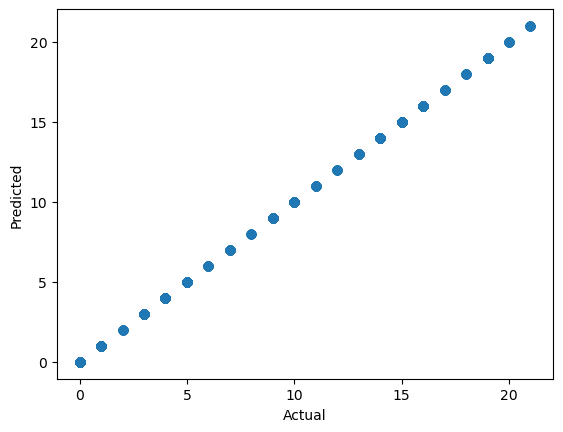

In [11]:
plt.scatter(Y_test["Institute"],Y_pred[:,0]);
plt.xlabel('Actual');
plt.ylabel('Predicted');

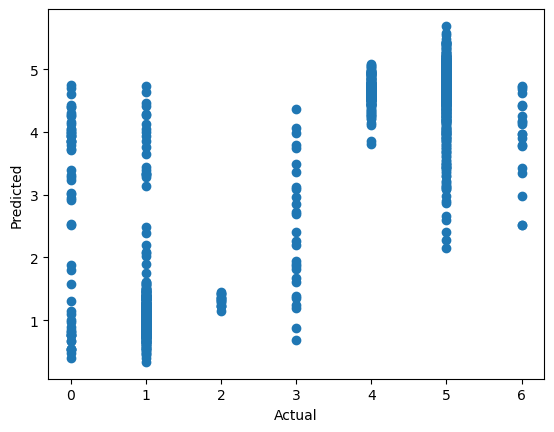

In [12]:
plt.scatter(Y_test["Degree"],Y_pred[:,1]);
plt.xlabel('Actual');
plt.ylabel('Predicted');

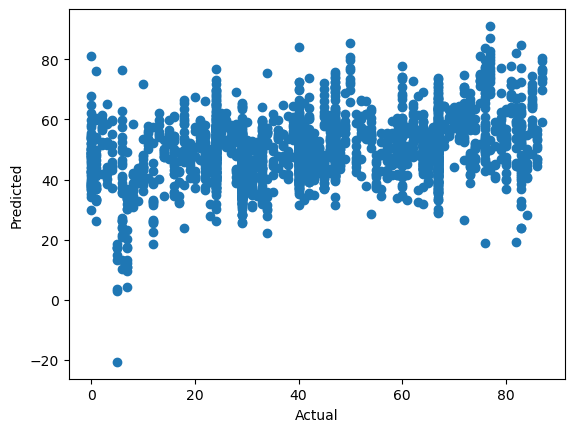

In [13]:
plt.scatter(Y_test["Branch"],Y_pred[:,2]);
plt.xlabel('Actual');
plt.ylabel('Predicted');

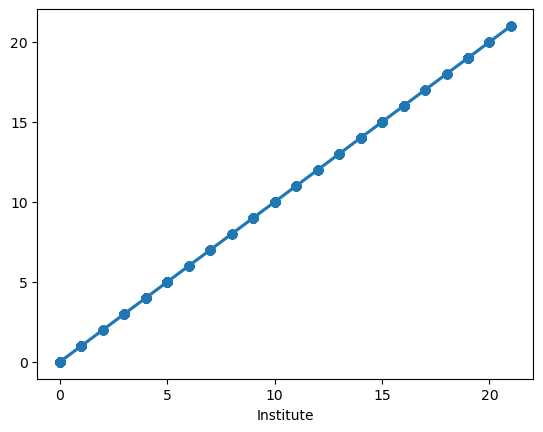

In [14]:
sns.regplot(x=Y_test["Institute"],y=Y_pred[:,0],ci=None);

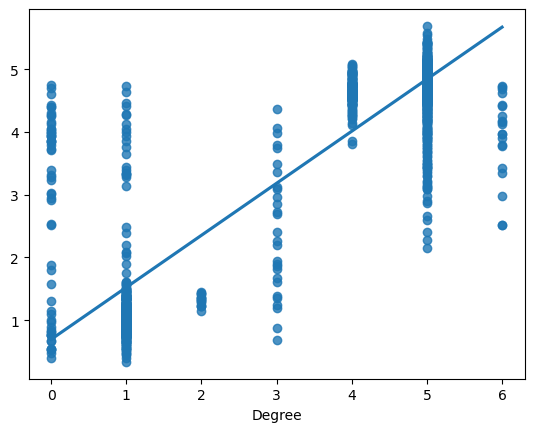

In [15]:
sns.regplot(x=Y_test["Degree"],y=Y_pred[:,1],ci=None);

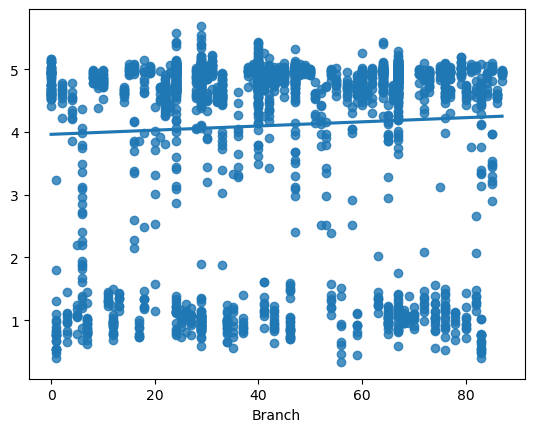

In [16]:
sns.regplot(x=Y_test["Branch"],y=Y_pred[:,1],ci=None);